In [1]:
from PIL import Image
import os
import torch.nn.functional as F
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2 as ToTensor
import numpy as np

import sys; sys.path.append('..')
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import jittor as jt
import jittor.nn as nn
from utils import *
from functools import partial
import cv2

%load_ext autoreload
%autoreload 2

[i 0707 14:54:10.050858 64 log.cc:351] Load log_sync: 1
[i 0707 14:54:10.217697 64 compiler.py:953] Jittor(1.3.4.15) src: /root/miniconda3/envs/jittor/lib/python3.7/site-packages/jittor
[i 0707 14:54:10.239365 64 compiler.py:954] g++ at /usr/bin/g++(7.5.0)
[i 0707 14:54:10.241543 64 compiler.py:955] cache_path: /root/.cache/jittor/jt1.3.4/g++7.5.0/py3.7.0/Linux-4.4.0-11x84/IntelRXeonRGolxda/default
[i 0707 14:54:10.272990 64 __init__.py:411] Found /usr/local/cuda/bin/nvcc(11.2.152) at /usr/local/cuda/bin/nvcc.
[i 0707 14:54:10.301121 64 __init__.py:411] Found addr2line(2.30) at /usr/bin/addr2line.
[i 0707 14:54:10.531658 64 compiler.py:1008] cuda key:cu11.2.152_sm_75
[i 0707 14:54:10.824274 64 __init__.py:227] Total mem: 376.57GB, using 16 procs for compiling.
[i 0707 14:54:11.046360 64 jit_compiler.cc:28] Load cc_path: /usr/bin/g++
[i 0707 14:54:11.444628 64 init.cc:62] Found cuda archs: [75,]
[i 0707 14:54:11.515452 64 __init__.py:411] Found mpicc(2.1.1) at /usr/bin/mpicc.
[i 0707 14

In [2]:
name1 = '3477113127_aca40d90bb_b.jpg'
name2 = '16509884617_9aef0a5dd3_b.jpg'
SEG_PATH = '/nas/landscape/train_val/labels'
IMG_PATH = '/nas/landscape/train_val/images'
seg1 = Image.open(os.path.join(SEG_PATH, name1.replace('.jpg', '.png')))
img1 = Image.open(os.path.join(IMG_PATH, name1))
seg2 = Image.open(os.path.join(SEG_PATH, name2.replace('.jpg', '.png')))
img2 = Image.open(os.path.join(IMG_PATH, name2))
seg1 = np.array(seg1)
seg2 = np.array(seg2)
img1 = np.array(img1)
img2 = np.array(img2)
print(seg1.shape, img1.shape, seg2.shape, img2.shape)

(768, 1024) (768, 1024, 3) (768, 1024) (768, 1024, 3)


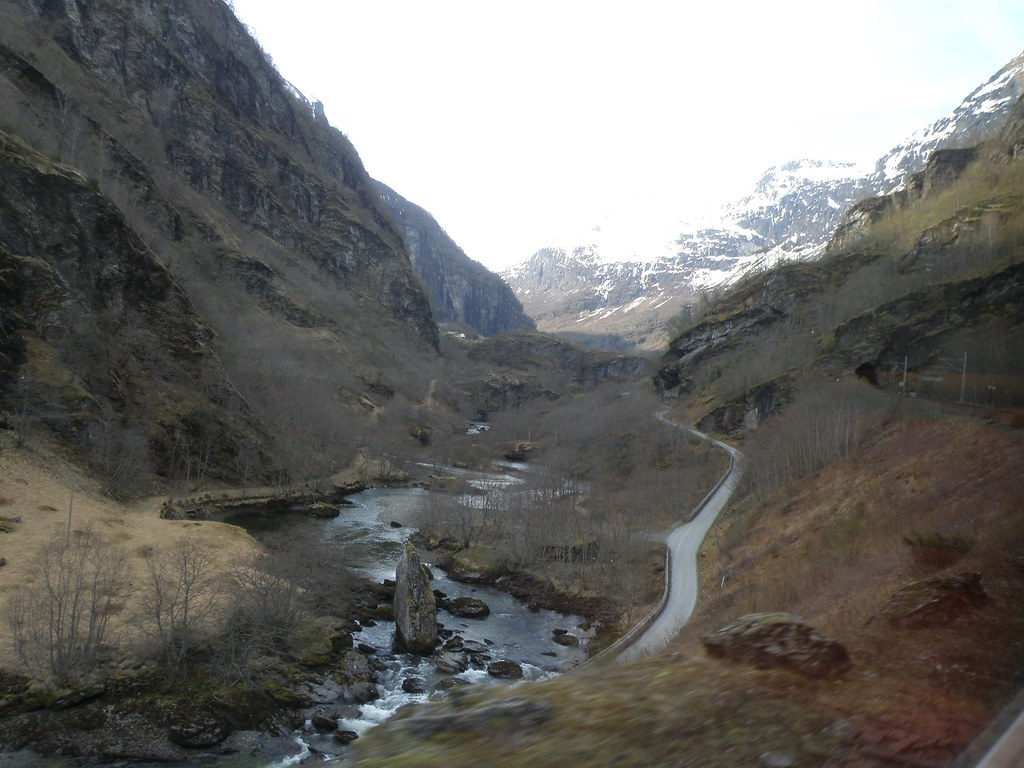

In [3]:
Image.open(os.path.join(IMG_PATH, name1))

In [4]:
train_transform = A.Compose([
    A.RandomCrop(width=384, height=384),
    A.Resize(height=256, width=256),
    A.HorizontalFlip(p=0.5),
    A.Lambda(image=convert_to_negetive_one_positive_one,
             mask=partial(to_onehot, n_labels=29)),
    ToVar(),
])

In [5]:
img, seg = train_transform(image=img1, mask=seg1).values()

In [6]:
print(img.shape, img.dtype, seg.shape, seg.dtype)

[3,256,256,] float32 [29,256,256,] float32


In [7]:
np.argmax(seg, axis=0).shape

(256, 256)

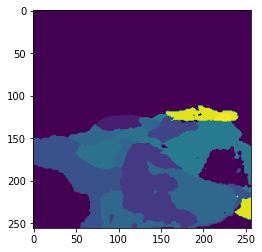

In [8]:
plt.imshow(np.argmax(seg, axis=0))

In [9]:
from model_jittor.dataset_jittor import LDMDataset, get_ldm_dataloader

In [10]:
train_loader, val_loader = get_ldm_dataloader()

There are total 10000 images,  use 9000 images for training and  1000 images for validation.
save train and val image names in train.txt and val.txt


In [11]:
import random
idx = random.randint(0, len(train_loader))
img, seg, name = train_loader[idx]
print(img.shape, seg.shape, name)

[3,256,256,] [29,256,256,] 30856636646_83402fd8af_b


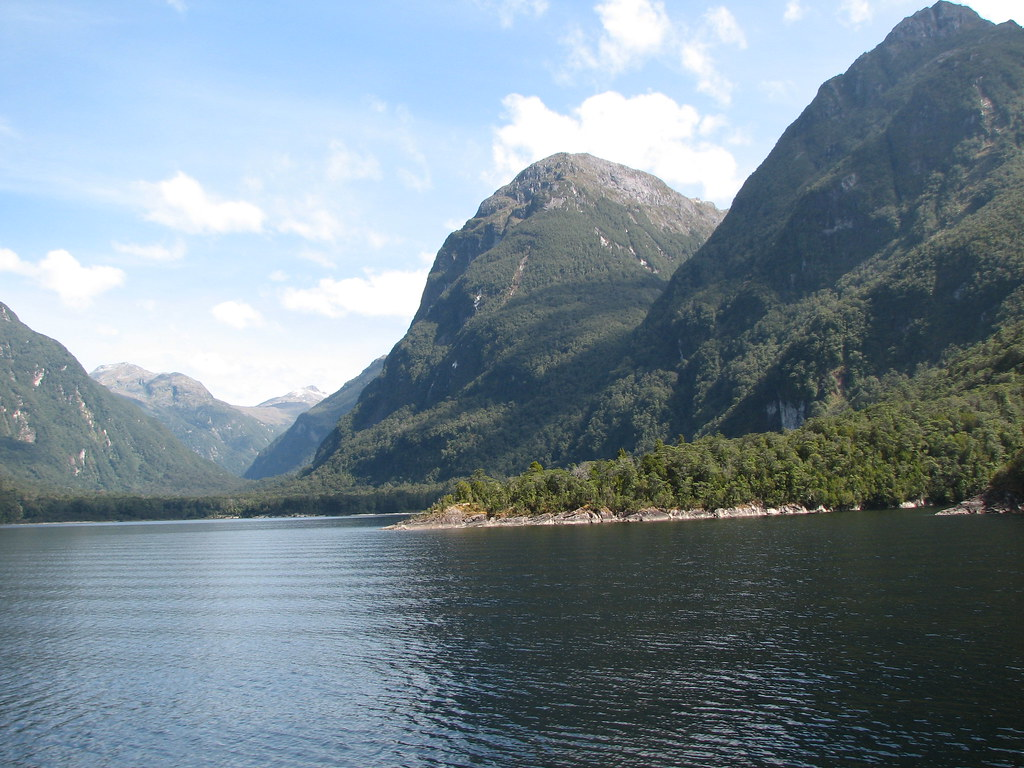

In [12]:
Image.open(os.path.join(IMG_PATH, f"{name}.jpg"))

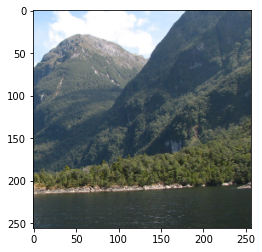

In [13]:
plt.imshow(((img + 1) / 2).data.transpose(1, 2, 0))

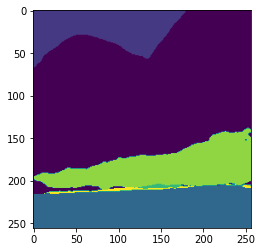

In [14]:
plt.imshow(np.argmax(seg, axis=0))